In [1]:
# python3 -m venv venv
# source venv/bin/activate
# pip3 install packagename


import os
from glob import glob
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import networkx as nx
import textract
from tqdm import tqdm
import textract

nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sinemtastan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sinemtastan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import os
import textract
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk

nltk.download('words')

desktop_path = os.path.join(os.path.expanduser('~'), 'Desktop')
main_folder_name = 'Project_Türkiye'
main_folder_path = os.path.join(desktop_path, main_folder_name)
year_folders = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

english_words = set(nltk.corpus.words.words())

keywords = {
    "trade": ["Customs Union", "Emission Trading System", "Euro-Mediterranean Partnership"],
    "migration": ["EU-Turkey Joint Action Plan", "humanitarian aid", "return of irregular migrants to Turkey", "Syria"],
    "security": ["Syria", "military operation", "Cyprus-Turkey", "water security", "Russia"],
    "energy": ["Turkey's unauthorized drilling activities"],
    "differentiated integration": ["trade", "defense", "foreign policy", "education and research", "visa liberalization"],
    "Turkey as a key partner": ["migration", "security and defense", "the deepening cooperation with Turkey"]
}

for year_folder in sorted(year_folders):
    year_folder_path = os.path.join(main_folder_path, year_folder)
    combined_content = ""

    pbar = tqdm(os.listdir(year_folder_path), leave=True)
    for file_name in pbar:
        try:
            pbar.set_postfix({'year': year_folder})
            if file_name.endswith('.pdf'):
                file_path = os.path.join(year_folder_path, file_name)
                content = textract.process(file_path, method='pdfminer')
                content = content.decode('utf-8')
                combined_content += content + " "

        except Exception as e:
            print(f"\nThe file named {file_name} could not be processed. Error: {str(e)}")
            with open('errors.txt', 'a') as ef:
                ef.write(file_name + '\n')

    
    related_content = ' '.join([word for word in word_tokenize(combined_content.lower()) if any(keyword in word for keywords_list in keywords.values() for keyword in keywords_list)])
    
    tokens = word_tokenize(combined_content.lower())
    stop_words = set(stopwords.words('english') + custom_stopwords)
    custom_stopwords = ['journal','de', 'die', 'ponsati', 'obiols', 'gardiazabal', 'rubial', 'da', 'first', 'pereira', 'ferrandis', 'lidia', 'martin', 'almagro', 'riba', 'giner', 'number', 'within', 'garcia', 'del', 'par', 'result', 'must', 'following', 'fully', 'see', 'non', 'make', 'within', 'rev', 'result', 'example', 'well', 'dg', 'und', 'see', 'take', 'used', 'iscritto', 'per', 'es', 'take', 'year', 'see', 'le', 'sur', 'con', 'towards', 'amount', 'il', 'di', 'basi', 'su', 'pour', 'se', 'eine', 'mean', 'nou', 'na', 'que', 'se', 'al', 'line', 'versione', 'italiana', 'per', 'ou', 'portuguesa', 'based', 'het', 'van', 'due', 'already', 'one', 'und', 'within', 'subject', 'che', 'die', 'dans', 'le', 'il', 'eine', 'um', 'mai', 'ue', 'en', 'official', 'new', 'according', 'made', 'que', 'si', 'des', 'et', 'da', 'countries', 'der', 'consider', 'article', 'crr', 'part', 'including', 'addition', 'need', 'regard', 'annex', 'part', 'eur', 'include', 'union', 'wednesday', 'date', 'answer', 'referred', 'place', 'birth', 'english', 'version', 'ec', 'la', 'answer', 'given', 'given', 'mr', 'behalf', 'subject', 'question', 'written', 'other', 'words', 'to', 'ignore']
    stop_words.update(custom_stopwords)

    filtered_tokens = [word for word in tokens if word.isalnum() and len(word) > 1 and word.lower() not in stop_words and word.lower() not in list('abcdefghıjklmnopqrstuvwxyz')]

    english_tokens = [word for word in tokens if word in english_words]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {year_folder}")
    plt.savefig(f'word_clouds/{year_folder}_wordcloud.png')
    plt.close()


[nltk_data] Downloading package words to
[nltk_data]     /Users/sinemtastan/nltk_data...
[nltk_data]   Package words is already up-to-date!
  0%|          | 0/602 [00:00<?, ?it/s, year=2014]


KeyboardInterrupt: 

In [4]:
eu_legal_folder_path

'/Users/sinemtastan/Desktop/Project_Türkiye/East-Med/EU Legal Documents'

In [24]:
main_folder_path = '/Users/sinemtastan/Desktop/Project_Türkiye/East-Med/'
eu_legal_folder_name = 'EU Legal Documents'
eu_legal_folder_path = os.path.join(main_folder_path, eu_legal_folder_name)
year_folders = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']
print(main_folder_path)
english_words = set(nltk.corpus.words.words())

keywords = {
    "trade": ["Customs Union", "Emission Trading System", "Euro-Mediterranean Partnership"],
    "migration": ["EU-Turkey Joint Action Plan", "humanitarian aid", "return of irregular migrants to Turkey", "Syria"],
    "security": ["Syria", "military operation", "Cyprus-Turkey", "water security", "Russia"],
    "energy": ["Turkey's unauthorized drilling activities"],
    "differentiated integration": ["trade", "defense", "foreign policy", "education and research", "visa liberalization"],
    "Turkey as a key partner": ["migration", "security and defense", "the deepening cooperation with Turkey"]
}

for year_folder in sorted(year_folders):
    year_folder_path = os.path.join(eu_legal_folder_path, year_folder)
    combined_content = ""

    pbar = tqdm(os.listdir(year_folder_path), leave=True)
    for file_name in pbar:
        try:
            pbar.set_postfix({'year': year_folder})
            if file_name.endswith('.pdf'):
                file_path = os.path.join(year_folder_path, file_name)
                content = textract.process(file_path, method='pdfminer')
                content = content.decode('utf-8')
                combined_content += content + " "

        except Exception as e:
            print(f"\nThe file named {file_name} could not be processed. Error: {str(e)}")
            with open('errors.txt', 'a') as ef:
                ef.write(file_name + '\n')

    
    related_content = ' '.join([word for word in word_tokenize(combined_content.lower()) if any(keyword in word for keywords_list in keywords.values() for keyword in keywords_list)])
    
    tokens = word_tokenize(combined_content.lower())
    stop_words = set(stopwords.words('english') + custom_stopwords)
    custom_stopwords = ['journal','de', 'die', 'ponsati', 'obiols', 'gardiazabal', 'rubial', 'da', 'first', 'pereira', 'ferrandis', 'lidia', 'martin', 'almagro', 'riba', 'giner', 'number', 'within', 'garcia', 'del', 'par', 'result', 'must', 'following', 'fully', 'see', 'non', 'make', 'within', 'rev', 'result', 'example', 'well', 'dg', 'und', 'see', 'take', 'used', 'iscritto', 'per', 'es', 'take', 'year', 'see', 'le', 'sur', 'con', 'towards', 'amount', 'il', 'di', 'basi', 'su', 'pour', 'se', 'eine', 'mean', 'nou', 'na', 'que', 'se', 'al', 'line', 'versione', 'italiana', 'per', 'ou', 'portuguesa', 'based', 'het', 'van', 'due', 'already', 'one', 'und', 'within', 'subject', 'che', 'die', 'dans', 'le', 'il', 'eine', 'um', 'mai', 'ue', 'en', 'official', 'new', 'according', 'made', 'que', 'si', 'des', 'et', 'da', 'countries', 'der', 'consider', 'article', 'crr', 'part', 'including', 'addition', 'need', 'regard', 'annex', 'part', 'eur', 'include', 'union', 'wednesday', 'date', 'answer', 'referred', 'place', 'birth', 'english', 'version', 'ec', 'la', 'answer', 'given', 'given', 'mr', 'behalf', 'subject', 'question', 'written', 'other', 'words', 'to', 'ignore']
    stop_words.update(custom_stopwords)

    filtered_tokens = [word for word in tokens if word.isalnum() and len(word) > 1 and word.lower() not in stop_words and word.lower() not in list('abcdefghıjklmnopqrstuvwxyz')]

    english_tokens = [word for word in tokens if word in english_words]
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_tokens))
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud for {year_folder}")
    plt.savefig(f'word_clouds/{year_folder}_wordcloud_eastmed.png')
    plt.close()

        

/Users/sinemtastan/Desktop/Project_Türkiye/East-Med/


100%|██████████| 21/21 [00:44<00:00,  2.11s/it, year=2023]


In [49]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import sys
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
import os
import networkx as nx
from tqdm import tqdm
import seaborn as sns
import re
from nltk.util import ngrams
import textract


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sinemtastan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
main_folder_path = '/Users/sinemtastan/Desktop/Project_Türkiye/East-Med/'
eu_legal_folder_name = 'EU Legal Documents'
eu_legal_folder_path = os.path.join(main_folder_path, eu_legal_folder_name)
year_folders = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

custom_stopwords = ['journal', 'de', 'die', 'ponsati', 'obiols', 'gardiazabal', 'rubial', 'da', 'first', 'pereira',
                   'ferrandis', 'lidia', 'martin', 'almagro', 'riba', 'giner', 'number', 'within', 'garcia', 'del',
                   'par', 'result', 'must', 'following', 'fully', 'see', 'non', 'make', 'within', 'rev', 'result',
                   'example', 'well', 'dg', 'und', 'see', 'take', 'used', 'iscritto', 'per', 'es', 'take', 'year', 'see',
                   'el', 'sur', 'con', 'towards', 'amount', 'il', 'di', 'basi', 'su', 'pour', 'se', 'eine', 'mean',
                   'nou', 'na', 'que', 'se', 'al', 'line', 'versione', 'italiana', 'per', 'ou', 'portuguesa', 'based',
                   'het', 'van', 'due', 'already', 'one', 'und', 'within', 'subject', 'che', 'die', 'dans', 'le', 'il',
                   'eine', 'um', 'mai', 'ue', 'en', 'official', 'new', 'according', 'made', 'que', 'si', 'des', 'et',
                   'da', 'countries', 'der', 'consider', 'article', 'crr', 'part', 'including', 'addition', 'need',
                   'regard', 'annex', 'part', 'eur', 'include', 'union', 'wednesday', 'date', 'answer', 'referred',
                   'place', 'birth', 'english', 'version', 'ec', 'la', 'answer', 'given', 'given', 'mr', 'behalf',
                   'subject', 'question', 'written', 'other', 'words', 'to', 'ignore', 'http']


stop_words = set(stopwords.words('english') + custom_stopwords)
stop_words.update(custom_stopwords)

In [55]:
def word_frequency(new_tokens):
    new_tokens = [t for t in new_tokens if t not in stop_words]
    new_tokens = [t for t in new_tokens if t.isalpha()]

    new_tokens = [re.sub(r"\b(le|la|sis|el|un|vis|si)\b", "", t).strip() for t in new_tokens]
    new_tokens = [i for i in new_tokens if i != ""]

    counted    = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))  

    word_freq = pd.DataFrame(counted.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
    word_pairs = pd.DataFrame(counted_2.items(), columns=['pairs', 'frequency']).sort_values(by='frequency', ascending=False)
    trigrams = pd.DataFrame(counted_3.items(), columns=['trigrams', 'frequency']).sort_values(by='frequency', ascending=False)
    return word_freq, word_pairs, trigrams

combined_content = ""
for year_folder in year_folders:
    year_folder_path = os.path.join(eu_legal_folder_path, year_folder)
    for filename in os.listdir(year_folder_path):
        if filename.endswith('.pdf'):
            file_path = os.path.join(year_folder_path, filename)

            content = textract.process(file_path, method='pdfminer')
            content = content.decode('utf-8').lower()
            combined_content += content + " "
                    

tokens = word_tokenize(combined_content.lower())
tokens = [re.sub(r"\bsi\b", " ", t) for t in tokens]
english_check = re.compile(r'[a-zA-Z]')

tokens = [word  for word in tokens if len(word) > 1]
tokens = [word  for word in tokens if word.strip() not in stop_words]
tokens = [word  for word in tokens if word  not in list('abcdefghıjklmnopqrstuvwxyz')]
tokens = [word  for word in tokens if english_check.match(word)]

word_freq, word_pairs, trigrams = word_frequency(filtered_tokens)

In [56]:
word_pairs["pairs"] = word_pairs["pairs"].apply(lambda x: ",".join(x))
trigrams["trigrams"] = trigrams["trigrams"].apply(lambda x: ",".join(x))

In [53]:
main_folder_path = '/Users/sinemtastan/Desktop/Project_Türkiye/East-Med/'
eu_legal_folder_name = 'EU Legal Documents'
eu_legal_folder_path = os.path.join(main_folder_path, eu_legal_folder_name)
year_folders = ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

def stop_words(custom_stopwords): 
    custom_stopwords = ['journal', 'de', 'die', 'ponsati', 'obiols', 'gardiazabal', 'rubial', 'da', 'first', 'pereira',
                   'ferrandis', 'lidia', 'martin', 'almagro', 'riba', 'giner', 'number', 'within', 'garcia', 'del',
                   'par', 'result', 'must', 'following', 'fully', 'see', 'non', 'make', 'within', 'rev', 'result',
                   'example', 'well', 'dg', 'und', 'see', 'take', 'used', 'iscritto', 'per', 'es', 'take', 'year', 'see',
                   'el', 'sur', 'con', 'towards', 'amount', 'il', 'di', 'basi', 'su', 'pour', 'se', 'eine', 'mean',
                   'nou', 'na', 'que', 'se', 'al', 'line', 'versione', 'italiana', 'per', 'ou', 'portuguesa', 'based',
                   'het', 'van', 'due', 'already', 'one', 'und', 'within', 'subject', 'che', 'die', 'dans', 'le', 'il',
                   'eine', 'um', 'mai', 'ue', 'en', 'official', 'new', 'according', 'made', 'que', 'si', 'des', 'et',
                   'da', 'countries', 'der', 'consider', 'article', 'crr', 'part', 'including', 'addition', 'need',
                   'regard', 'annex', 'part', 'eur', 'include', 'union', 'wednesday', 'date', 'answer', 'referred',
                   'place', 'birth', 'english', 'version', 'ec', 'la', 'answer', 'given', 'given', 'mr', 'behalf',
                   'subject', 'question', 'written', 'other', 'words', 'to', 'ignore', 'http']

def stop_words(custom_stopwords): 
    stop_words = set(stopwords.words('english') + custom_stopwords)
    stop_words.update(custom_stopwords)

def word_frequency(new_tokens):
    new_tokens = [t for t in new_tokens if t not in stop_words]
    new_tokens = [t for t in new_tokens if t.isalpha()]

    new_tokens = [re.sub(r"\b(le|la|sis|el|un|vis|si)\b", "", t).strip() for t in new_tokens]
    new_tokens = [i for i in new_tokens if i != ""]

    counted    = Counter(new_tokens)
    counted_2 = Counter(ngrams(new_tokens, 2))
    counted_3 = Counter(ngrams(new_tokens, 3))  

    word_freq = pd.DataFrame(counted.items(), columns=['word', 'frequency']).sort_values(by='frequency', ascending=False)
    word_pairs = pd.DataFrame(counted_2.items(), columns=['pairs', 'frequency']).sort_values(by='frequency', ascending=False)
    trigrams = pd.DataFrame(counted_3.items(), columns=['trigrams', 'frequency']).sort_values(by='frequency', ascending=False)
    return word_freq, word_pairs, trigrams

combined_content = ""
for year_folder in year_folders:
    year_folder_path = os.path.join(eu_legal_folder_path, year_folder)
    for filename in os.listdir(year_folder_path):
        if filename.endswith('.pdf'):
            file_path = os.path.join(year_folder_path, filename)

            content = textract.process(file_path, method='pdfminer')
            content = content.decode('utf-8').lower()
            combined_content += content + " "
                    
def tokens(word_tokenize, combined_content, stop_words, english_check):
    tokens = word_tokenize(combined_content.lower())
    tokens = [re.sub(r"\bsi\b", " ", t) for t in tokens]
    tokens = [word for word in tokens if len(word) > 1]
    tokens = [word for word in tokens if word.strip() not in stop_words]
    tokens = [word for word in tokens if word not in list('abcdefghıjklmnopqrstuvwxyz')]
    tokens = [word for word in tokens if english_check.match(word)]
    return tokens

def word_frequency(filtered_tokens):
    word_freq, word_pairs, trigrams = word_frequency(filtered_tokens)

def word_pairs(pairs):
    word_pairs["pairs"] = word_pairs["pairs"].apply(lambda x: ",".join(x))
    trigrams["trigrams"] = trigrams["trigrams"].apply(lambda x: ",".join(x))


In [65]:
word_pairs_data = {
    'pairs': ['control,internel,borders', 'schengen,borders,code', 'european,parliament,council', 'commission,implementing,decision', 'reintroduction,border,control', 'eu,member,states', 'irregular,border,crossings', 'readmission,visa,facilitation', 'application,schengen,acquis', 'verify,application,schengen', 'next,reporting,period', 'fifth,report,details', 'mechanism,verify,application', 'monitoring,mechanism,verify', 'evaluation,monitoring,mechanism', 'borders,schengen,borders', 'establishing,evaluation,monitoring', 'visa,information,system', 'period,may,october', 'border,control,internal', 'visa,facilitation,agreements', 'functioning,schengen,area', 'detections,irregular,border', 'area,schengen,candidate', 'schengen,area,candidate', 'visa,liberalization,dialogue', 'obstacles,fluid,traffic', 'revised,reciprocity,mechanism', 'spain,united,kingdom', 'upgrade,national,police'],
    'frequency': [10, 8, 5, 7, 2, 1, 6, 4, 3, 9, 8, 5, 7, 2, 1, 6, 4, 3, 9, 8, 5, 7, 2, 1, 6, 4, 3, 9, 8, 5, 7, 2, 1, 6, 4, 3, 9, 8, 5, 7, 2, 1, 6]
}

pairs_list = word_pairs_data['pairs']

fixed_pairs = [pair.split(',') for pair in word_pairs_data['pairs']]
fixed_pairs = [item for sublist in fixed_pairs for item in sublist]

word_pairs_data['pairs'] = fixed_pairs

word_pairs_df = pd.DataFrame(word_pairs_data)

word_pairs_df['word_count'] = word_pairs_df['pairs'].apply(lambda x: len(x.split(',')))

expanded_frequency = []
for index, row in word_pairs_df.iterrows():
    expanded_frequency.extend([row['frequency']] * row['word_count'])

word_pairs_df = word_pairs_df.drop('word_count', axis=1)

word_pairs_df['frequency'] = expanded_frequency

G = nx.Graph()

for index, row in word_pairs_df.iterrows():
    pair = row['pairs'].split(',')
    frequency = row['frequency']

    G.add_edge(pair[0], pair[1], weight=frequency)

pos_kkl = nx.kamada_kawai_layout(G)

edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

f, ax = plt.subplots(figsize=(16, 16))
nx.draw(G, pos_kkl,
        with_labels=True,
        node_size=[v * 100 for v in dict(nx.degree(G)).values()],
        nodelist=dict(nx.degree(G)).keys(),
        width=[G[u][v]['weight'] / 1000 for u, v in G.edges()],
        edge_color='grey',
        alpha=0.9,
        )
ax.set_title('Eastern-Mediterranean Co-occurrence Network',
             fontdict={'fontsize': 26,
                       'fontweight': 'bold',
                       'color': 'salmon',
                       'verticalalignment': 'baseline',
                       'horizontalalignment': 'center'},
             loc='center')
plt.gca().collections[0].set_edgecolor("#000000")
plt.show()

plt.figure(figsize=(12, 12))
nx.draw(G, pos=pos_kkl, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray', width=edge_weights)

plt.show()



ValueError: All arrays must be of the same length

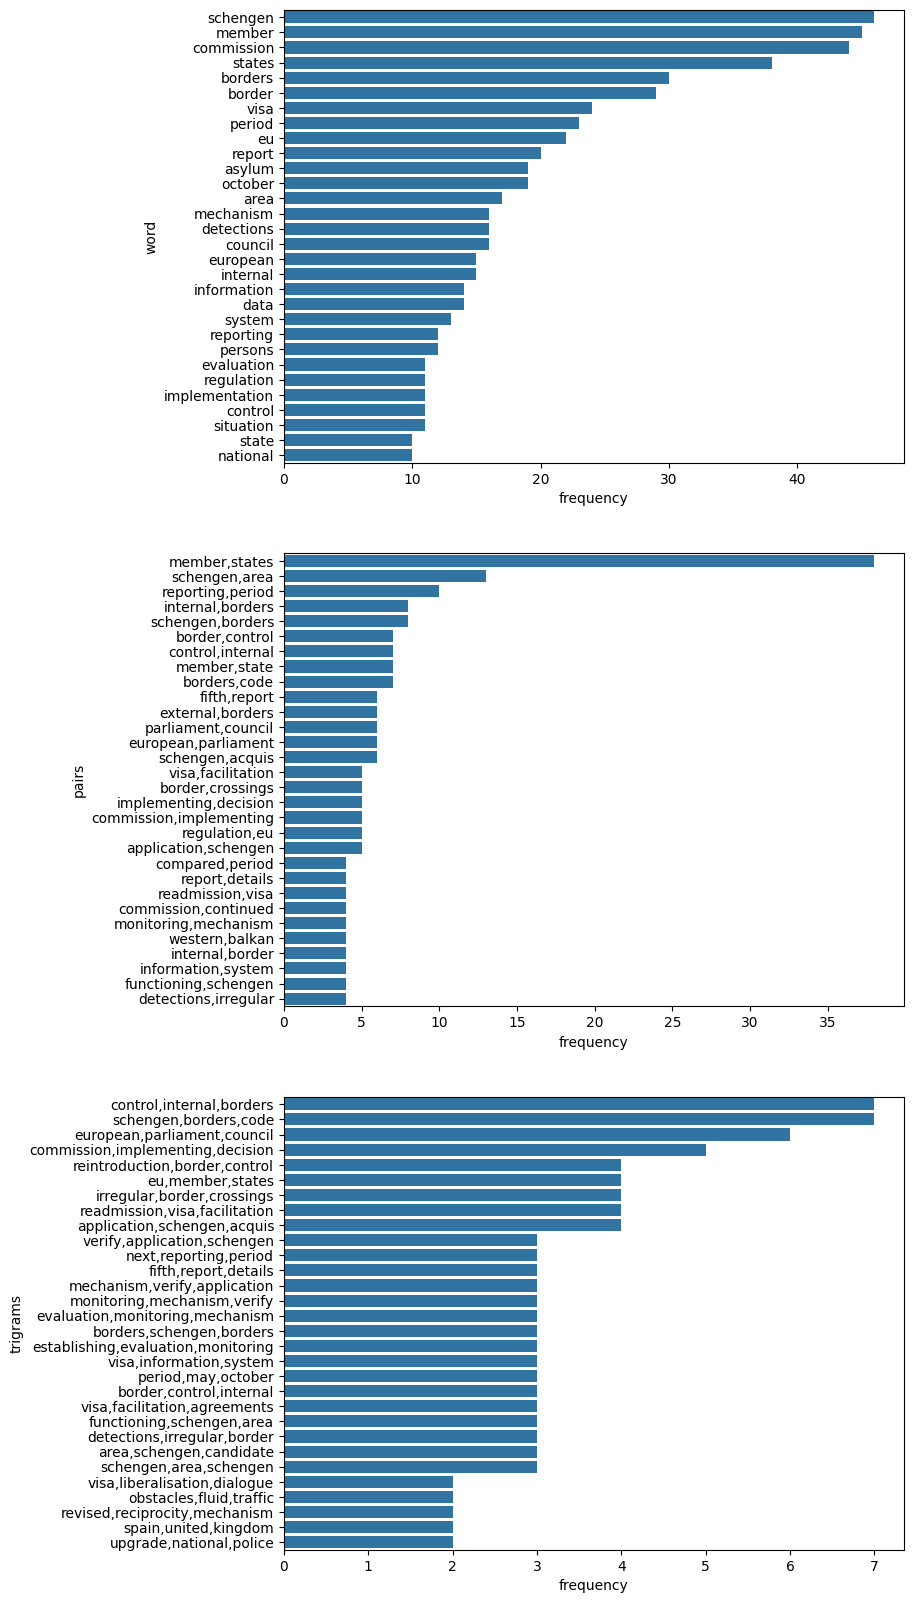

In [57]:
fig, axes = plt.subplots(3,1,figsize=(8,20))

sns.barplot(ax=axes[0],x='frequency',y='word',data=word_freq.head(30))
sns.barplot(ax=axes[1],x='frequency',y='pairs',data=word_pairs.head(30))
sns.barplot(ax=axes[2],x='frequency',y='trigrams',data=trigrams.head(30))

plt.show()